In [30]:
from merlin.core import dataset
from pprint import pprint
from matplotlib import pyplot as plt
import numpy as np
dSet = dataset.MERFISHDataSet('test_data')
pTask = dSet.load_analysis_task('PlotPerformance')

In [21]:
barcodeDB = pTask.filterTask.get_barcode_database()
bc = barcodeDB.get_barcodes()
codebook = dSet.get_codebook()
pprint(bc.columns)
pprint(codebook.columns)

Index(['area', 'barcode', 'barcode_id', 'cell_index', 'fov', 'global_x',
       'global_y', 'global_z', 'max_intensity', 'mean_distance',
       'mean_intensity', 'min_distance', 'x', 'y', 'z'],
      dtype='object')
Index(['name', 'id', 'barcode'], dtype='object')


In [22]:
blankIDs = codebook[codebook['name'].str.contains('Blank')]
codingIDs = codebook[~codebook['name'].str.contains('Blank')]

In [24]:
blankBC = bc[bc['barcode_id'].isin(blankIDs.index)]
codingBC = bc[~bc['barcode_id'].isin(blankIDs.index)]

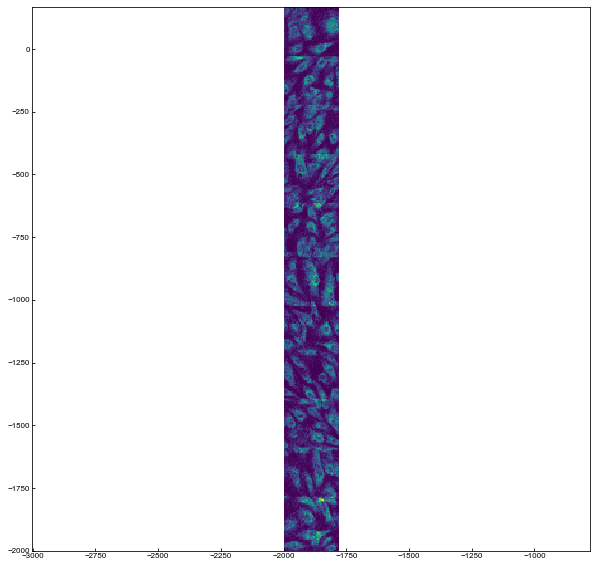

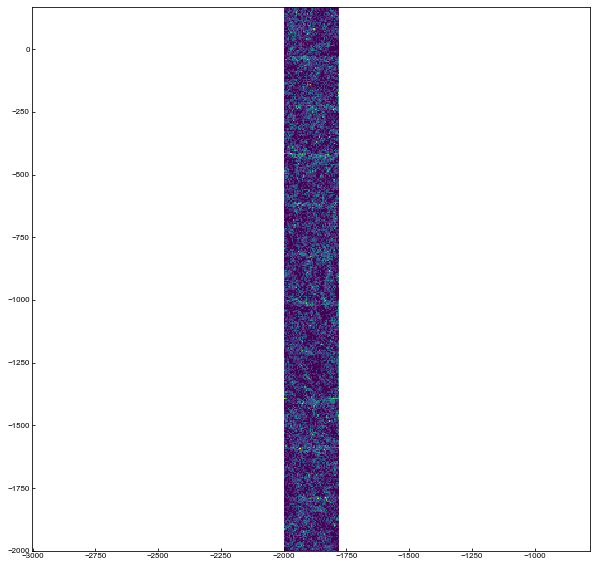

In [44]:
minX = np.min(bc['global_x'])
maxX = np.max(bc['global_x'])
minY = np.min(bc['global_y'])
maxY = np.max(bc['global_y'])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist2d(codingBC['global_x'], codingBC['global_y'],bins=(np.ceil(maxX-minX)/5, np.ceil(maxY-minY)/5))
ax.set_aspect('equal', 'datalim')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist2d(blankBC['global_x'], blankBC['global_y'],bins=(np.ceil(maxX-minX)/5, np.ceil(maxY-minY)/5))
ax.set_aspect('equal', 'datalim')

In [33]:
maxX - minX

216.87599999999998

In [34]:
maxY - minY 

2166.9025